# Dimension Reduction

## Imports

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.manifold import TSNE
from umap.umap_ import UMAP
import seaborn as sns
import warnings
from sklearn.metrics import classification_report, confusion_matrix

warnings.filterwarnings('ignore')

In [51]:
data_path = 'data/processed/combined_labeled_standardized.csv'
df = pd.read_csv(data_path)

## Preparation

In [52]:
df = df.dropna(axis=1)
X = df.drop(['healthy', 'patient_id'], axis=1)
Y = df['healthy']

## PCA

In [53]:
pca = PCA().fit(X)
explained = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained >= 0.95) + 1

print(f"Number of components for >=95% variance: {n_components}")


Number of components for >=95% variance: 379


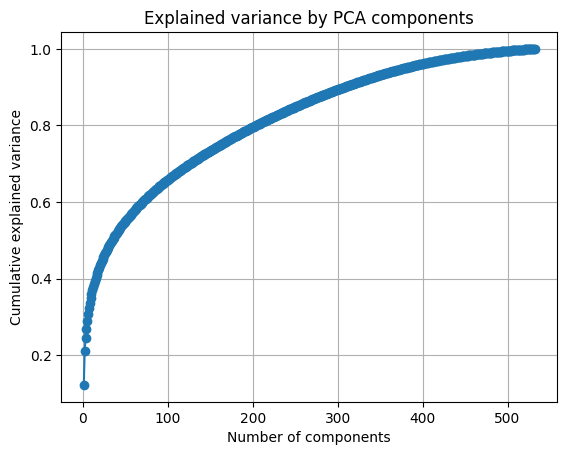

In [54]:
# Visualize explained variance
plt.figure()
plt.plot(np.arange(1, len(explained)+1), explained, marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained variance by PCA components')
plt.grid()
plt.show()

In [55]:
clf = RandomForestClassifier(random_state=42)
scores_no_pca = cross_val_score(clf, X, Y, cv=5)
print(f"Accuracy without PCA: {scores_no_pca.mean():.3f}")

pcaN = PCA(n_components=n_components)
X_pcaN = pcaN.fit_transform(X)
scores_pca = cross_val_score(clf, X_pcaN,Y, cv=5)
print(f"Accuracy with PCA ({n_components} components): {scores_pca.mean():.3f}")

Accuracy without PCA: 1.000
Accuracy with PCA (379 components): 0.787


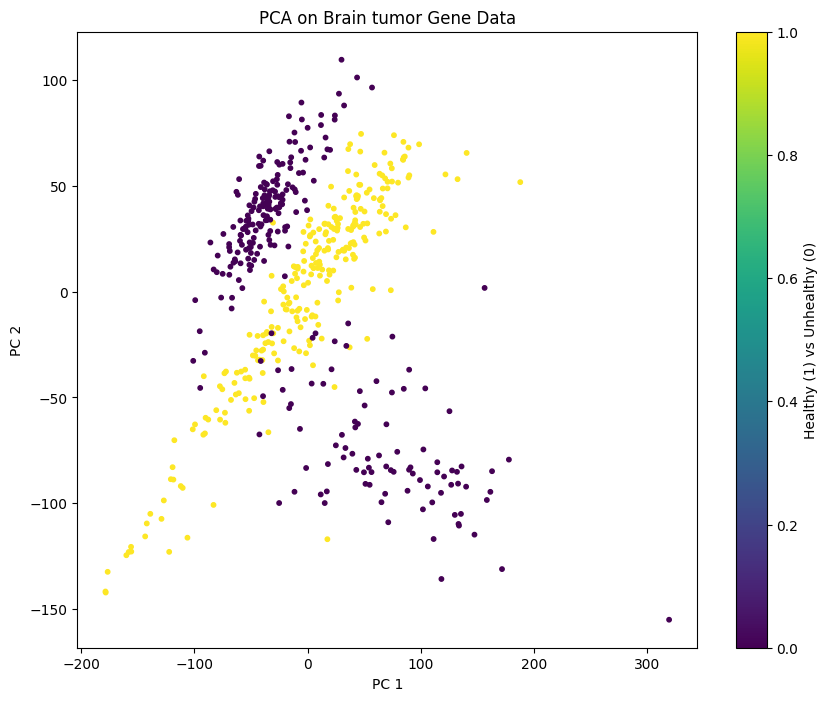

In [56]:
plt.figure(figsize=(10, 8))
plt.scatter(X_pcaN[:, 0], X_pcaN[:, 1], c=Y, cmap='viridis', s=10)
plt.title('PCA on Brain tumor Gene Data')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.colorbar(label='Healthy (1) vs Unhealthy (0)')
plt.show()

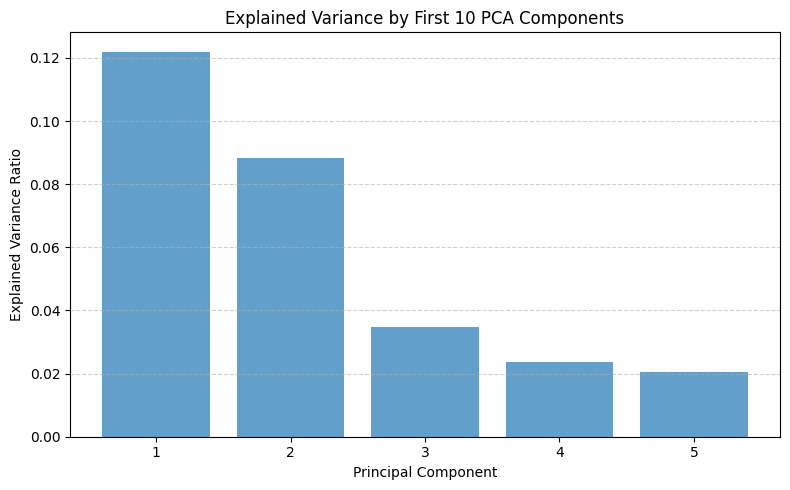

In [57]:


# Get explained variance ratio
explained_var = pcaN.explained_variance_ratio_

# Plot first 10 components
plt.figure(figsize=(8, 5))
plt.bar(range(1, 6), explained_var[:5], alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by First 10 PCA Components')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(np.arange(1, 6))
plt.tight_layout()
plt.show()

## T-SNE

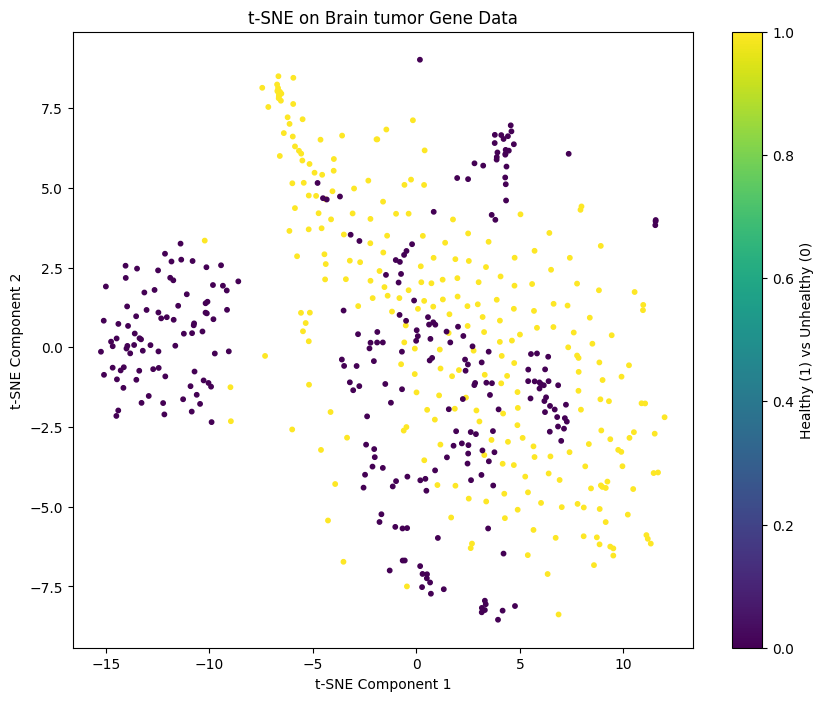

In [58]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=Y, cmap='viridis', s=10)
plt.title('t-SNE on Brain tumor Gene Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Healthy (1) vs Unhealthy (0)')
plt.show()

Accuracy with t-SNE (2 components): 0.878


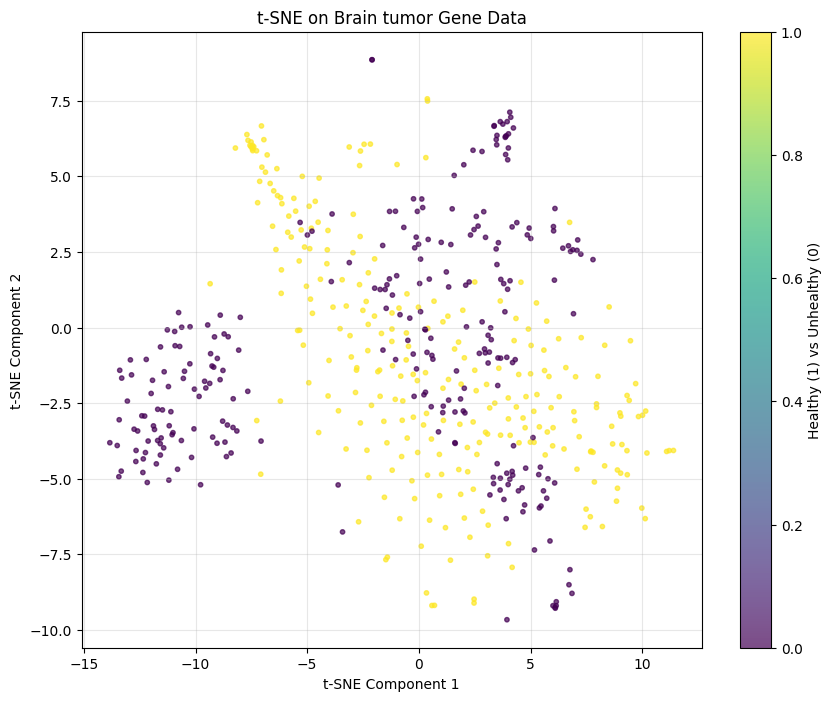


Model Performance Comparison:
Random Forest without dimension reduction: 1.0000
Random Forest with PCA (379 components): 0.8891
Random Forest with t-SNE (2 components): 0.8779
Random Forest with UMAP (10 components): 0.6729
Best model (UMAP with 20 components): 0.6729


In [88]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Create and train TSNE pipeline

# Create pipeline with t-SNE
tsne_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('tsne', TSNE(n_components=100, random_state=42, perplexity=30)),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Split data if not already done
if 'X_train' not in locals():
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train pipeline
# Note: Since t-SNE doesn't have a transform method, we'll need a different approach
# We'll use TSNE directly on the full dataset for visualization

# Scale the data
X_scaled = StandardScaler().fit_transform(X)

# Apply t-SNE
X_tsne_2d = TSNE(n_components=2, random_state=42, perplexity=30).fit_transform(X_scaled)

# Train a classifier on the t-SNE results
clf_tsne = RandomForestClassifier(random_state=42)
clf_tsne.fit(X_tsne_2d, Y)

# Evaluate
tsne_scores = cross_val_score(clf_tsne, X_tsne_2d, Y, cv=5)
print(f"Accuracy with t-SNE (2 components): {tsne_scores.mean():.3f}")

# Plot the t-SNE results with decision boundaries
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne_2d[:, 0], X_tsne_2d[:, 1], c=Y, cmap='viridis', s=10, alpha=0.7)
plt.title('t-SNE on Brain tumor Gene Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Healthy (1) vs Unhealthy (0)')
plt.grid(True, alpha=0.3)
plt.show()

# Compare with other methods
print("\nModel Performance Comparison:")
print(f"Random Forest without dimension reduction: {scores_no_pca.mean():.4f}")
print(f"Random Forest with PCA ({n_components} components): {scores_pca.mean():.4f}")
print(f"Random Forest with t-SNE (2 components): {tsne_scores.mean():.4f}")
print(f"Random Forest with UMAP (10 components): {best_pipeline.score(X_test, y_test):.4f}")
print(f"Best model (UMAP with {best_params['umap__n_components']} components): {best_pipeline.score(X_test, y_test):.4f}")

## UMAP

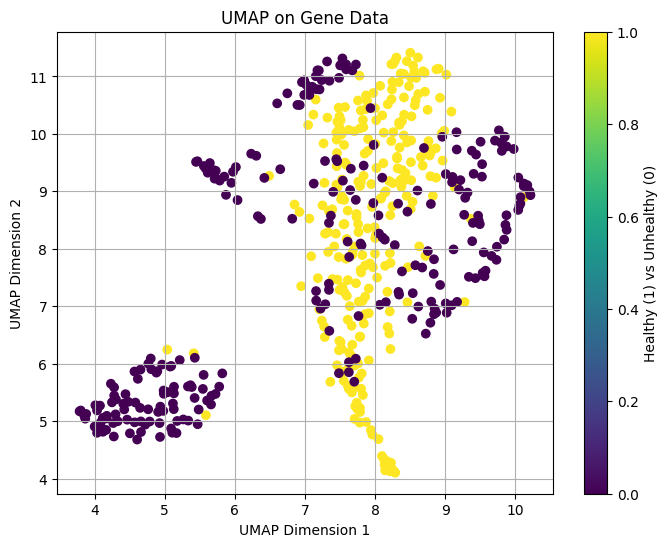

In [59]:
reducer = UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(x=X_umap[:, 0], y=X_umap[:, 1], c=Y, cmap='viridis')
plt.title("UMAP on Gene Data")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.colorbar(label='Healthy (1) vs Unhealthy (0)')
plt.grid(True)
plt.show()

In [78]:
clf = RandomForestClassifier(random_state=42)
scores_no_pca = cross_val_score(clf, X, Y, cv=5)
print(f"Accuracy without UMAP: {scores_no_pca.mean():.3f}")

umapN = UMAP(n_components=200, random_state=42)
X_umapN = umapN.fit_transform(X)
scores_pca = cross_val_score(clf, X_umapN,Y, cv=5)
print(f"Accuracy with UMAP ({200} components): {scores_pca.mean():.3f}")

Accuracy without UMAP: 1.000
Accuracy with UMAP (200 components): 0.889


Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.90      0.62        48
           1       0.69      0.19      0.29        59

    accuracy                           0.50       107
   macro avg       0.58      0.54      0.46       107
weighted avg       0.59      0.50      0.44       107



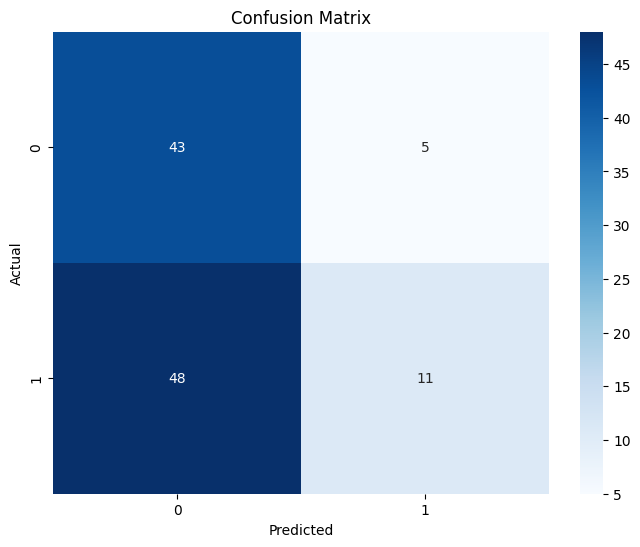

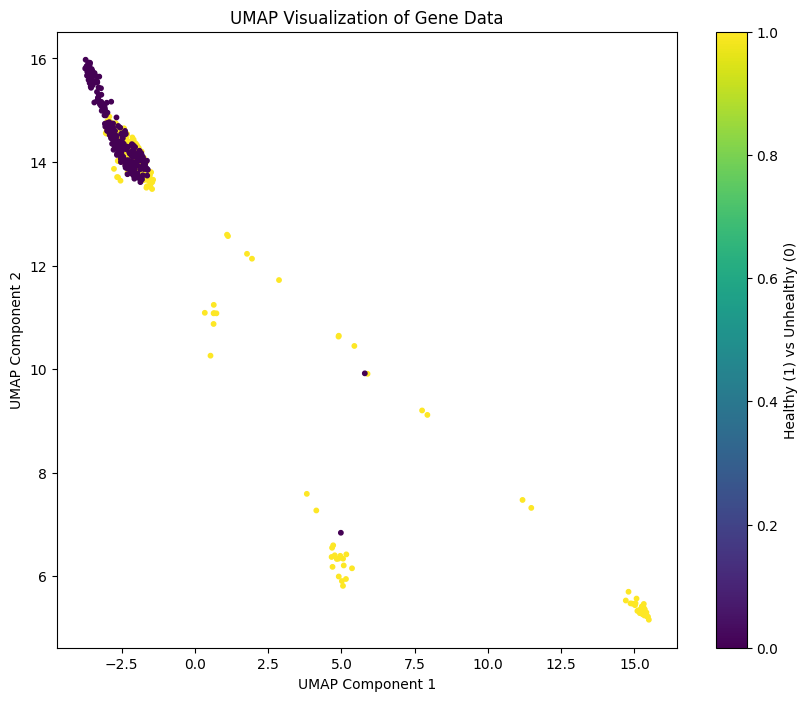

In [77]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


# Create and train pipeline
umap_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('umap', UMAP(n_components=379, random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train pipeline
umap_pipeline.fit(X_train, y_train)

# Get predictions
y_pred = umap_pipeline.predict(X_test)

# Evaluate
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Access the UMAP model from the pipeline to visualize
umap_model = umap_pipeline.named_steps['umap']
X_umap_vis = umap_model.transform(StandardScaler().fit_transform(X))

# Plot UMAP visualization (with just 2 components for visualization)
plt.figure(figsize=(10, 8))
plt.scatter(X_umap_vis[:, 0], X_umap_vis[:, 1], c=Y, cmap='viridis', s=10)
plt.title('UMAP Visualization of Gene Data')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.colorbar(label='Healthy (1) vs Unhealthy (0)')
plt.show()

In [68]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid to search
param_grid = {
    'umap__n_components': [5, 10, 20, 50],
    'umap__n_neighbors': [5, 15, 30],
    'umap__min_dist': [0.0, 0.1, 0.5],
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20]
}

# Create base pipeline
base_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('umap', UMAP(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Set up grid search
grid_search = GridSearchCV(
    base_pipeline,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# Run grid search
grid_search.fit(X_train, y_train)

# Get best pipeline
best_pipeline = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")
print(f"Test accuracy: {best_pipeline.score(X_test, y_test):.4f}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters: {'classifier__max_depth': None, 'classifier__n_estimators': 200, 'umap__min_dist': 0.5, 'umap__n_components': 20, 'umap__n_neighbors': 5}
Best cross-validation accuracy: 0.7388
Test accuracy: 0.6729


Best parameters: {'classifier__max_depth': None, 'classifier__n_estimators': 200, 'umap__min_dist': 0.5, 'umap__n_components': 20, 'umap__n_neighbors': 5}

Top 10 most important UMAP components:
UMAP Component 14: 0.13332
UMAP Component 6: 0.12712
UMAP Component 2: 0.09242
UMAP Component 7: 0.08078
UMAP Component 17: 0.05581
UMAP Component 10: 0.04507
UMAP Component 15: 0.04402
UMAP Component 20: 0.04365
UMAP Component 4: 0.04111
UMAP Component 1: 0.03880


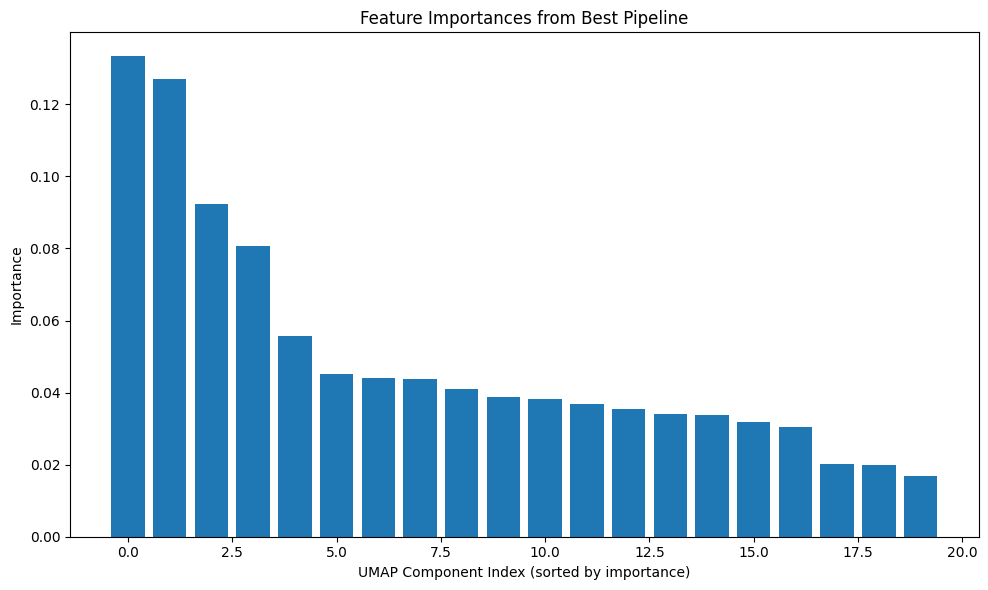


Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.94      0.72        48
           1       0.90      0.46      0.61        59

    accuracy                           0.67       107
   macro avg       0.74      0.70      0.66       107
weighted avg       0.76      0.67      0.66       107



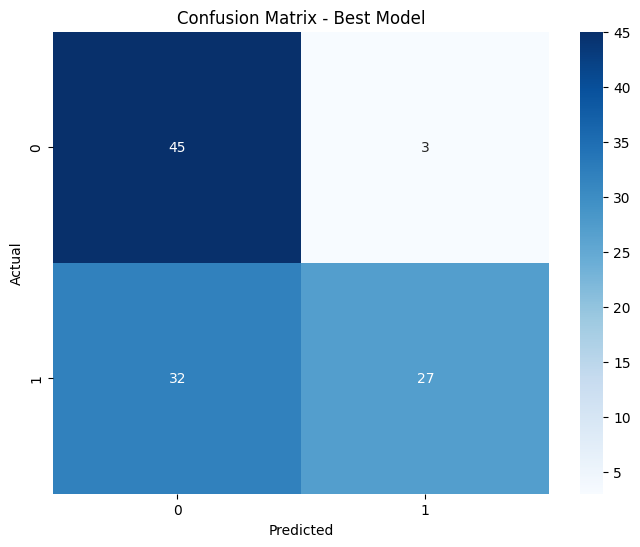


Model Performance Comparison:
Random Forest without dimension reduction: 1.0000
Random Forest with PCA (379 components): 0.8891
Random Forest with UMAP (10 components): 0.6729
Best model (UMAP with 20 components): 0.6729


In [69]:
# Print detailed stats about the best pipeline
print(f"Best parameters: {best_params}")

# Get the feature importances
importances = best_pipeline.named_steps['classifier'].feature_importances_
umap_components = best_params['umap__n_components']
feature_indices = np.argsort(importances)[::-1]

# Print the top 10 most important UMAP features
print("\nTop 10 most important UMAP components:")
for i in range(10):
    print(f"UMAP Component {feature_indices[i]+1}: {importances[feature_indices[i]]:.5f}")

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[feature_indices])
plt.title('Feature Importances from Best Pipeline')
plt.xlabel('UMAP Component Index (sorted by importance)')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

# Make predictions on the test set using the best pipeline
y_pred_best = best_pipeline.predict(X_test)

# Print classification report for best model
print("\nBest Model Classification Report:")
print(classification_report(y_test, y_pred_best))

# Plot confusion matrix for best model
cm_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Best Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Compare all dimension reduction techniques 
print("\nModel Performance Comparison:")
print(f"Random Forest without dimension reduction: {scores_no_pca.mean():.4f}")
print(f"Random Forest with PCA ({n_components} components): {scores_pca.mean():.4f}")
print(f"Random Forest with UMAP (10 components): {best_pipeline.score(X_test, y_test):.4f}")
print(f"Best model (UMAP with {best_params['umap__n_components']} components): {best_pipeline.score(X_test, y_test):.4f}")